In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pplt  
import seaborn as sns 
from pandas.plotting import scatter_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn import metrics
import statsmodels.api as sm

In [2]:
salarydata_train=pd.read_csv('C:\\Users\\suman\\Desktop\\Assignment\\DS Assignment\\SalaryData_Train(1).csv')
salarydata_test=pd.read_csv('C:\\Users\\suman\\Desktop\\Assignment\\DS Assignment\\SalaryData_Test(1).csv')
salarydata_train.head()
salarydata_test.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,0
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,0
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,1
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,1
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,0


In [3]:
salarydata_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  object
 2   education      30161 non-null  object
 3   educationno    30161 non-null  int64 
 4   maritalstatus  30161 non-null  object
 5   occupation     30161 non-null  object
 6   relationship   30161 non-null  object
 7   race           30161 non-null  object
 8   sex            30161 non-null  object
 9   capitalgain    30161 non-null  int64 
 10  capitalloss    30161 non-null  int64 
 11  hoursperweek   30161 non-null  int64 
 12  native         30161 non-null  object
 13  Salary         30161 non-null  int64 
dtypes: int64(6), object(8)
memory usage: 3.2+ MB


In [4]:
salarydata_train.shape

(30161, 14)

In [5]:
salarydata_test.shape

(15060, 14)

In [6]:
salarydata_train.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


In [7]:
salarydata_test.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,0
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,0
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,1
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,1
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,0


In [8]:
salarydata_train.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek,Salary
count,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000
mean,38.438115,10.121316,1092.044064,88.302311,40.931269,0.248931
std,13.134830,2.550037,7406.466611,404.121321,11.980182,0.432401
min,17.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000,0.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000,0.000000
75%,47.000000,13.000000,0.000000,0.000000,45.000000,0.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000,1.000000


In [9]:
salarydata_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15060 entries, 0 to 15059
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            15060 non-null  int64 
 1   workclass      15060 non-null  object
 2   education      15060 non-null  object
 3   educationno    15060 non-null  int64 
 4   maritalstatus  15060 non-null  object
 5   occupation     15060 non-null  object
 6   relationship   15060 non-null  object
 7   race           15060 non-null  object
 8   sex            15060 non-null  object
 9   capitalgain    15060 non-null  int64 
 10  capitalloss    15060 non-null  int64 
 11  hoursperweek   15060 non-null  int64 
 12  native         15060 non-null  object
 13  Salary         15060 non-null  int64 
dtypes: int64(6), object(8)
memory usage: 1.6+ MB


In [10]:
salarydata_test.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek,Salary
count,15060.000000,15060.000000,15060.000000,15060.000000,15060.000000,15060.000000
mean,38.768327,10.112749,1120.301594,89.041899,40.951594,0.245684
std,13.380676,2.558727,7703.181842,406.283245,12.062831,0.430506
min,17.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000,0.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000,0.000000
75%,48.000000,13.000000,0.000000,0.000000,45.000000,0.000000
max,90.000000,16.000000,99999.000000,3770.000000,99.000000,1.000000


In [11]:
salarydata_train.isin(['?']).sum(axis=0)

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [12]:
salarydata_test.isin(['?']).sum(axis=0)

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [13]:
print(salarydata_train[0:5])

   age          workclass   education  educationno        maritalstatus  \
0   39          State-gov   Bachelors           13        Never-married   
1   50   Self-emp-not-inc   Bachelors           13   Married-civ-spouse   
2   38            Private     HS-grad            9             Divorced   
3   53            Private        11th            7   Married-civ-spouse   
4   28            Private   Bachelors           13   Married-civ-spouse   

           occupation    relationship    race      sex  capitalgain  \
0        Adm-clerical   Not-in-family   White     Male         2174   
1     Exec-managerial         Husband   White     Male            0   
2   Handlers-cleaners   Not-in-family   White     Male            0   
3   Handlers-cleaners         Husband   Black     Male            0   
4      Prof-specialty            Wife   Black   Female            0   

   capitalloss  hoursperweek          native  Salary  
0            0            40   United-States       0  
1           

In [14]:
categorical = [var for var in salarydata_train.columns if salarydata_train[var].dtype=='O']

print('There are {} categorical variables\n'.format(len(categorical)))

print('The categorical variables are :\n\n', categorical)

There are 8 categorical variables

The categorical variables are :

 ['workclass', 'education', 'maritalstatus', 'occupation', 'relationship', 'race', 'sex', 'native']


In [15]:
salarydata_train[categorical].head()

,workclass,education,maritalstatus,occupation,relationship,race,sex,native
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba


In [16]:
salarydata_train[categorical].isnull().sum()

workclass        0
education        0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
native           0
dtype: int64

In [17]:
for var in categorical: 
    
    print(salarydata_train[var].value_counts())

 Private             22285
 Self-emp-not-inc     2499
 Local-gov            2067
 State-gov            1279
 Self-emp-inc         1074
 Federal-gov           943
 Without-pay            14
Name: workclass, dtype: int64
 HS-grad         9840
 Some-college    6677
 Bachelors       5044
 Masters         1627
 Assoc-voc       1307
 11th            1048
 Assoc-acdm      1008
 10th             820
 7th-8th          557
 Prof-school      542
 9th              455
 12th             377
 Doctorate        375
 5th-6th          288
 1st-4th          151
 Preschool         45
Name: education, dtype: int64
 Married-civ-spouse       14065
 Never-married             9725
 Divorced                  4214
 Separated                  939
 Widowed                    827
 Married-spouse-absent      370
 Married-AF-spouse           21
Name: maritalstatus, dtype: int64
 Prof-specialty       4038
 Craft-repair         4030
 Exec-managerial      3992
 Adm-clerical         3721
 Sales                3584
 Other

In [18]:
for var in categorical: 
    
    print(salarydata_train[var].value_counts()/np.float(len(salarydata_train)))

 Private             0.738868
 Self-emp-not-inc    0.082855
 Local-gov           0.068532
 State-gov           0.042406
 Self-emp-inc        0.035609
 Federal-gov         0.031266
 Without-pay         0.000464
Name: workclass, dtype: float64
 HS-grad         0.326249
 Some-college    0.221379
 Bachelors       0.167236
 Masters         0.053944
 Assoc-voc       0.043334
 11th            0.034747
 Assoc-acdm      0.033421
 10th            0.027187
 7th-8th         0.018468
 Prof-school     0.017970
 9th             0.015086
 12th            0.012500
 Doctorate       0.012433
 5th-6th         0.009549
 1st-4th         0.005006
 Preschool       0.001492
Name: education, dtype: float64
 Married-civ-spouse       0.466331
 Never-married            0.322436
 Divorced                 0.139717
 Separated                0.031133
 Widowed                  0.027420
 Married-spouse-absent    0.012267
 Married-AF-spouse        0.000696
Name: maritalstatus, dtype: float64
 Prof-specialty       0.13388

C:\Users\suman\AppData\Local\Temp\ipykernel_552\217981199.py:3: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  print(salarydata_train[var].value_counts()/np.float(len(salarydata_train)))
C:\Users\suman\AppData\Local\Temp\ipykernel_552\217981199.py:3: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  print(salarydata_train[var].value_counts()/n

In [19]:
salarydata_train.workclass.unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' Self-emp-inc', ' Without-pay'], dtype=object)

In [20]:
salarydata_train.workclass.value_counts()

 Private             22285
 Self-emp-not-inc     2499
 Local-gov            2067
 State-gov            1279
 Self-emp-inc         1074
 Federal-gov           943
 Without-pay            14
Name: workclass, dtype: int64

In [21]:
salarydata_train.occupation.unique()

array([' Adm-clerical', ' Exec-managerial', ' Handlers-cleaners',
       ' Prof-specialty', ' Other-service', ' Sales', ' Transport-moving',
       ' Farming-fishing', ' Machine-op-inspct', ' Tech-support',
       ' Craft-repair', ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'], dtype=object)

In [22]:
salarydata_train.occupation.value_counts()

 Prof-specialty       4038
 Craft-repair         4030
 Exec-managerial      3992
 Adm-clerical         3721
 Sales                3584
 Other-service        3212
 Machine-op-inspct    1965
 Transport-moving     1572
 Handlers-cleaners    1350
 Farming-fishing       989
 Tech-support          912
 Protective-serv       644
 Priv-house-serv       143
 Armed-Forces            9
Name: occupation, dtype: int64

In [23]:
salarydata_train.native.unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', ' Mexico',
       ' Puerto-Rico', ' Honduras', ' England', ' Canada', ' Germany',
       ' Iran', ' Philippines', ' Poland', ' Columbia', ' Cambodia',
       ' Thailand', ' Ecuador', ' Laos', ' Taiwan', ' Haiti', ' Portugal',
       ' Dominican-Republic', ' El-Salvador', ' France', ' Guatemala',
       ' Italy', ' China', ' South', ' Japan', ' Yugoslavia', ' Peru',
       ' Outlying-US(Guam-USVI-etc)', ' Scotland', ' Trinadad&Tobago',
       ' Greece', ' Nicaragua', ' Vietnam', ' Hong', ' Ireland',
       ' Hungary'], dtype=object)

In [24]:
salarydata_train.native.value_counts()

 United-States                 27504
 Mexico                          610
 Philippines                     188
 Germany                         128
 Puerto-Rico                     109
 Canada                          107
 India                           100
 El-Salvador                     100
 Cuba                             92
 England                          86
 Jamaica                          80
 South                            71
 China                            68
 Italy                            68
 Dominican-Republic               67
 Vietnam                          64
 Guatemala                        63
 Japan                            59
 Poland                           56
 Columbia                         56
 Iran                             42
 Taiwan                           42
 Haiti                            42
 Portugal                         34
 Nicaragua                        33
 Peru                             30
 Greece                           29
 

In [25]:
for var in categorical:
    
    print(var, ' contains ', len(salarydata_train[var].unique()), ' labels')

workclass  contains  7  labels
education  contains  16  labels
maritalstatus  contains  7  labels
occupation  contains  14  labels
relationship  contains  6  labels
race  contains  5  labels
sex  contains  2  labels
native  contains  40  labels


In [26]:
numerical = [var for var in salarydata_train.columns if salarydata_train[var].dtype!='O']

print('There are {} numerical variables\n'.format(len(numerical)))

print('The numerical variables are :', numerical)

There are 6 numerical variables

The numerical variables are : ['age', 'educationno', 'capitalgain', 'capitalloss', 'hoursperweek', 'Salary']


In [27]:
salarydata_train[numerical].head()

,age,educationno,capitalgain,capitalloss,hoursperweek,Salary
0,39,13,2174,0,40,0
1,50,13,0,0,13,0
2,38,9,0,0,40,0
3,53,7,0,0,40,0
4,28,13,0,0,40,0


In [28]:
salarydata_train[numerical].isnull().sum()

age             0
educationno     0
capitalgain     0
capitalloss     0
hoursperweek    0
Salary          0
dtype: int64

In [29]:
X = salarydata_train.drop(['Salary'], axis=1)

y = salarydata_train['Salary']

In [30]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [31]:
X_train.shape, X_test.shape

((21112, 13), (9049, 13))

In [32]:
X_train.dtypes

age               int64
workclass        object
education        object
educationno       int64
maritalstatus    object
occupation       object
relationship     object
race             object
sex              object
capitalgain       int64
capitalloss       int64
hoursperweek      int64
native           object
dtype: object

In [33]:
X_test.dtypes

age               int64
workclass        object
education        object
educationno       int64
maritalstatus    object
occupation       object
relationship     object
race             object
sex              object
capitalgain       int64
capitalloss       int64
hoursperweek      int64
native           object
dtype: object

In [34]:
categorical = [col for col in X_train.columns if X_train[col].dtypes == 'O']

categorical

['workclass',
 'education',
 'maritalstatus',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native']

In [35]:
numerical = [col for col in X_train.columns if X_train[col].dtypes != 'O']

numerical

['age', 'educationno', 'capitalgain', 'capitalloss', 'hoursperweek']

In [36]:
X_train[categorical].isnull().mean()

workclass        0.0
education        0.0
maritalstatus    0.0
occupation       0.0
relationship     0.0
race             0.0
sex              0.0
native           0.0
dtype: float64

In [37]:
for col in categorical:
    if X_train[col].isnull().mean()>0:
        print(col, (X_train[col].isnull().mean()))

In [38]:
for df2 in [X_train, X_test]:
    df2['workclass'].fillna(X_train['workclass'].mode()[0], inplace=True)
    df2['occupation'].fillna(X_train['occupation'].mode()[0], inplace=True)
    df2['native'].fillna(X_train['native'].mode()[0], inplace=True)

In [39]:
X_train[categorical].isnull().sum()

workclass        0
education        0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
native           0
dtype: int64

In [40]:
X_test[categorical].isnull().sum()

workclass        0
education        0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
native           0
dtype: int64

In [41]:
X_train.isnull().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
dtype: int64

In [42]:
X_test.isnull().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
dtype: int64

In [43]:
X_train[categorical].head()

,workclass,education,maritalstatus,occupation,relationship,race,sex,native
8166,Local-gov,Some-college,Married-civ-spouse,Protective-serv,Husband,White,Male,United-States
7138,Private,Some-college,Never-married,Other-service,Own-child,White,Male,United-States
437,Private,HS-grad,Never-married,Transport-moving,Not-in-family,White,Male,United-States
5436,Private,HS-grad,Married-civ-spouse,Craft-repair,Husband,White,Male,United-States
6541,Self-emp-not-inc,HS-grad,Married-civ-spouse,Tech-support,Husband,White,Male,United-States


In [44]:
import category_encoders as ce

In [45]:
encoder = ce.OneHotEncoder(cols=['workclass', 'education', 'maritalstatus', 'occupation', 'relationship', 
                                 'race', 'sex', 'native'])

X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)

In [46]:
X_train.head()

,age,workclass_1,workclass_2,workclass_3,workclass_4,workclass_5,workclass_6,workclass_7,education_1,education_2,...,native_31,native_32,native_33,native_34,native_35,native_36,native_37,native_38,native_39,native_40
8166,54,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
7138,21,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
437,30,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
5436,42,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
6541,37,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [47]:
X_train.shape

(21112, 102)

In [48]:
X_test.head()

,age,workclass_1,workclass_2,workclass_3,workclass_4,workclass_5,workclass_6,workclass_7,education_1,education_2,...,native_31,native_32,native_33,native_34,native_35,native_36,native_37,native_38,native_39,native_40
25338,21,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
18840,21,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8391,56,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18258,43,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
16669,53,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [49]:
X_test.shape

(9049, 102)

In [50]:
X_train.dtypes

age            int64
workclass_1    int64
workclass_2    int64
workclass_3    int64
workclass_4    int64
               ...  
native_36      int64
native_37      int64
native_38      int64
native_39      int64
native_40      int64
Length: 102, dtype: object

In [51]:
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
data_set = pd.read_csv("C:\\Users\\suman\\Desktop\\Assignment\\DS Assignment\\SalaryData_Train(1).csv")
data_set.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


In [52]:
import matplotlib as plt
%matplotlib inline

<AxesSubplot:xlabel='educationno'>

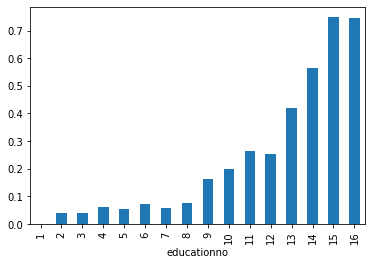

In [53]:
data_set.groupby('educationno').Salary.mean().plot(kind='bar')

<AxesSubplot:xlabel='occupation'>

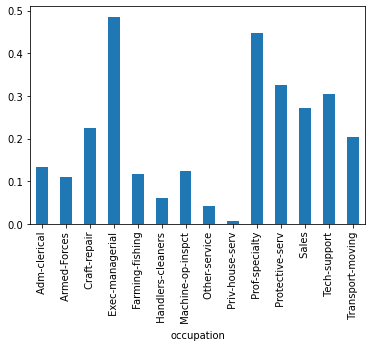

In [54]:
data_set.groupby('occupation').Salary.mean().plot(kind='bar')

<AxesSubplot:xlabel='relationship'>

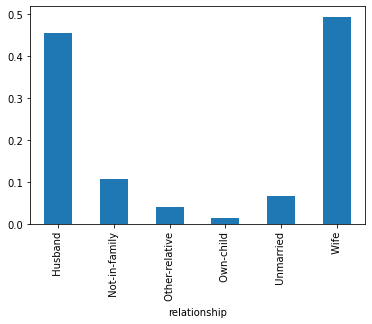

In [55]:
data_set.groupby('relationship').Salary.mean().plot(kind='bar')

<AxesSubplot:xlabel='race'>

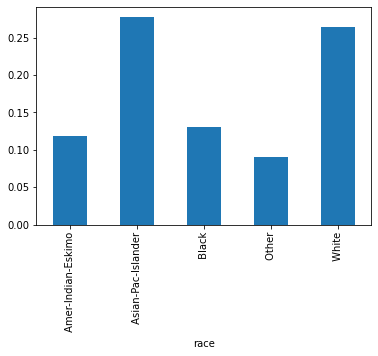

In [56]:
data_set.groupby('race').Salary.mean().plot(kind='bar')

<AxesSubplot:xlabel='sex'>

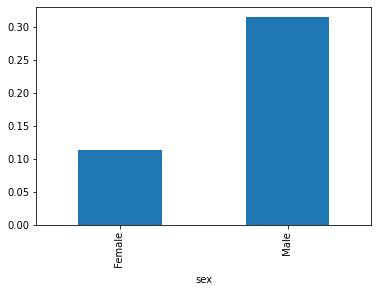

In [57]:
data_set.groupby('sex').Salary.mean().plot(kind='bar')

In [58]:
from sklearn.model_selection import train_test_split
X = data_set[['educationno', 'occupation']]
Y = data_set['Salary']
X_train, x_test, Y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

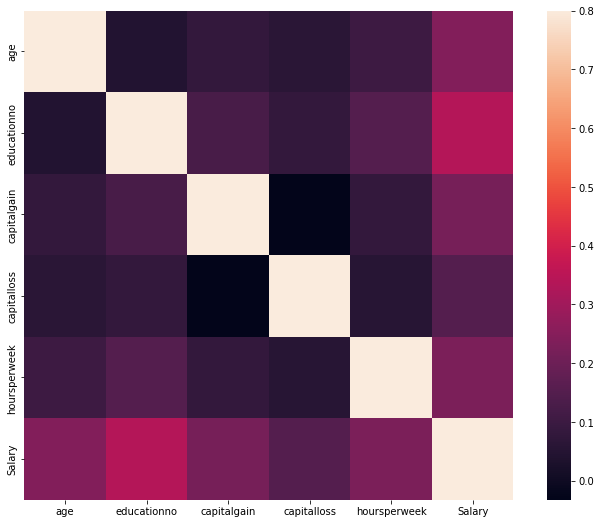

In [59]:
import seaborn as sns
import matplotlib.pyplot as pplt
corrmat = data_set.corr()
f, ax = pplt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

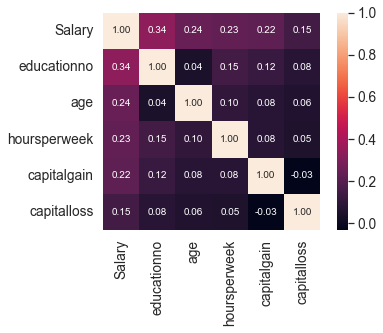

In [60]:
k=8
cols = corrmat.nlargest(k, 'Salary')['Salary'].index
cm = np.corrcoef(data_set[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
pplt.show()

In [61]:
X = data_set[['educationno', 'age']]
Y = data_set['Salary']
X_train, x_test, Y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [64]:
from sklearn.svm import SVC
classifier = SVC()
classifier.fit(X_train, Y_train)
score = classifier.score(x_test, y_test)
print(score)

0.7833581965854467


In [65]:
X = data_set[['educationno', 'age', 'hoursperweek', 'capitalgain']]
Y = data_set['Salary']
X_train, x_test, Y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [66]:
classifier = SVC()
classifier.fit(X_train, Y_train)
score = classifier.score(x_test, y_test)
print(score)

0.7957898226421349


<AxesSubplot:xlabel='race'>

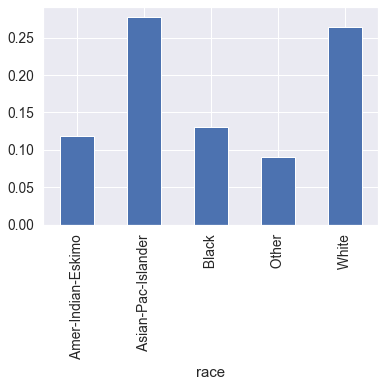

In [67]:
data_set.groupby('race').Salary.mean().plot(kind='bar')

<AxesSubplot:xlabel='age'>

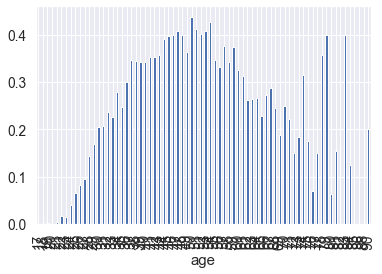

In [68]:
data_set.groupby('age').Salary.mean().plot(kind='bar')